In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def extract_rec_name(file_name: str) -> str:
	end_idx = file_name.rindex('__')
	return file_name[:end_idx]


def count_samples_per_file(df: pd.DataFrame) -> pd.DataFrame:
	agg_df = pd.DataFrame(
		data = {
			'class': df['class'],
			'recording': df['file'].apply(extract_rec_name)
		}
	)

	agg_features = ['recording', 'class']
	agg_df = agg_df.reset_index().groupby(agg_features).count()

	return agg_df.rename(columns = { 'index': 'sample_count' }).sort_values(by = 'class').reset_index()

In [6]:
def plot_sample_count(df: pd.DataFrame, x_label_col: str, x_rotation: str, x_label: str, title: str):
	all_colors = list(plt.get_cmap('Set3').colors)
	color_map = { }
	class_colors = []

	for i, cls in enumerate(df['class'].unique()):
		color_map[cls] = all_colors[i]

	for cls in df['class']:
		class_colors.append(color_map[cls])

	plt.bar(df[x_label_col], df['sample_count'], color = class_colors)
	plt.xticks(df[x_label_col], rotation = x_rotation)
	plt.xlabel(x_label)
	plt.title(title)

	handles = [plt.Rectangle((0, 0), 1, 1, color = color_map[label]) for label in df['class'].unique()]
	plt.legend(handles, df['class'].unique())

	plt.show()

## Brood size

In [4]:
bs_data = pd.read_csv('_data.export/s2.0-o1.0/brood-size.csv')
bs_data

,file,event,is_silence,class,2,3,4,5
0,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,contact,False,3,0,1,0,0
1,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,contact,False,3,0,1,0,0
2,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,contact,False,3,0,1,0,0
3,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,contact,False,3,0,1,0,0
4,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,contact,False,3,0,1,0,0
...,...,...,...,...,...,...,...,...
52921,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,contact,False,2,1,0,0,0
52922,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,contact,False,2,1,0,0,0
52923,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,contact,False,2,1,0,0,0
52924,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,contact,False,2,1,0,0,0


In [5]:
bs_agg_df = count_samples_per_file(bs_data[~bs_data['is_silence']])
bs_agg_df

,recording,class,sample_count
0,AT_1_2_1_22-BA04_BS02-2466C2065B90281B_2022060...,2,361
1,AT_1_2_1_22-BA10_BS02-24E144035BA44417_2022061...,2,2142
2,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,2,2667
3,Furka33_22a-BA05_BS02-248D9B02603706BB_2022071...,2,1158
4,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,3,142
5,AT_1_3_1_22-BA17_BS03-243B1F075C79F9E9_2022061...,3,1711
6,AT_1_6_1_22-BA06_BS03-243B1F075C79F9E9_2022060...,3,424
7,AT_1_6_1_22-BA13_BS03-243B1F055AD2F48C_2022061...,3,2446
8,Furka31_22a-BA16_BS03-247AA5015FDF2A00_2022080...,3,2531
9,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,3,876


In [6]:
bs_cls_agg_df = bs_agg_df[['class', 'sample_count']].groupby('class').sum().reset_index()
bs_cls_agg_df

,class,sample_count
0,2,6328
1,3,8130
2,4,23410
3,5,9113


In [7]:
bs_feeding_agg_df = count_samples_per_file(bs_data.loc[~bs_data['is_silence'] & (bs_data['event'] == 'feeding')])
bs_feeding_agg_df

,recording,class,sample_count
0,AT_1_2_1_22-BA04_BS02-2466C2065B90281B_2022060...,2,200
1,AT_1_2_1_22-BA10_BS02-24E144035BA44417_2022061...,2,182
2,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,2,26
3,Furka33_22a-BA05_BS02-248D9B02603706BB_2022071...,2,211
4,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,3,14
5,AT_1_3_1_22-BA17_BS03-243B1F075C79F9E9_2022061...,3,366
6,AT_1_6_1_22-BA06_BS03-243B1F075C79F9E9_2022060...,3,171
7,AT_1_6_1_22-BA13_BS03-243B1F055AD2F48C_2022061...,3,202
8,Furka31_22a-BA16_BS03-247AA5015FDF2A00_2022080...,3,103
9,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,3,286


In [8]:
bs_feed_cls_agg_df = bs_feeding_agg_df[['class', 'sample_count']].groupby('class').sum().reset_index()
bs_feed_cls_agg_df

,class,sample_count
0,2,619
1,3,1142
2,4,3208
3,5,884


In [9]:
bs_contact_agg_df = count_samples_per_file(bs_data.loc[~bs_data['is_silence'] & (bs_data['event'] == 'contact')])
bs_contact_agg_df

,recording,class,sample_count
0,AT_1_2_1_22-BA04_BS02-2466C2065B90281B_2022060...,2,161
1,AT_1_2_1_22-BA10_BS02-24E144035BA44417_2022061...,2,1960
2,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,2,2641
3,Furka33_22a-BA05_BS02-248D9B02603706BB_2022071...,2,947
4,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,3,128
5,AT_1_3_1_22-BA17_BS03-243B1F075C79F9E9_2022061...,3,1345
6,AT_1_6_1_22-BA06_BS03-243B1F075C79F9E9_2022060...,3,253
7,AT_1_6_1_22-BA13_BS03-243B1F055AD2F48C_2022061...,3,2244
8,Furka31_22a-BA16_BS03-247AA5015FDF2A00_2022080...,3,2428
9,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,3,590


In [10]:
bs_contact_cls_agg_df = bs_contact_agg_df[['class', 'sample_count']].groupby('class').sum().reset_index()
bs_contact_cls_agg_df

,class,sample_count
0,2,5709
1,3,6988
2,4,20202
3,5,8229


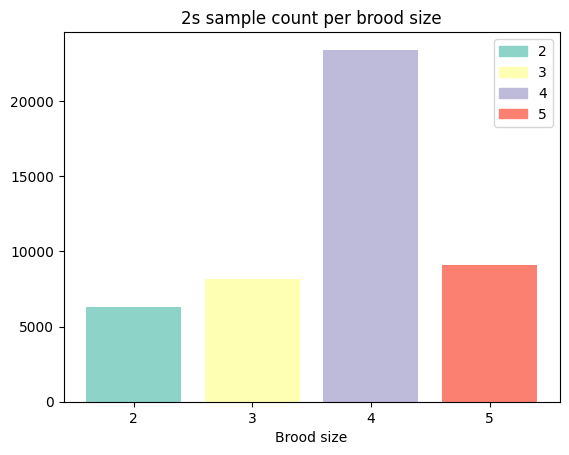

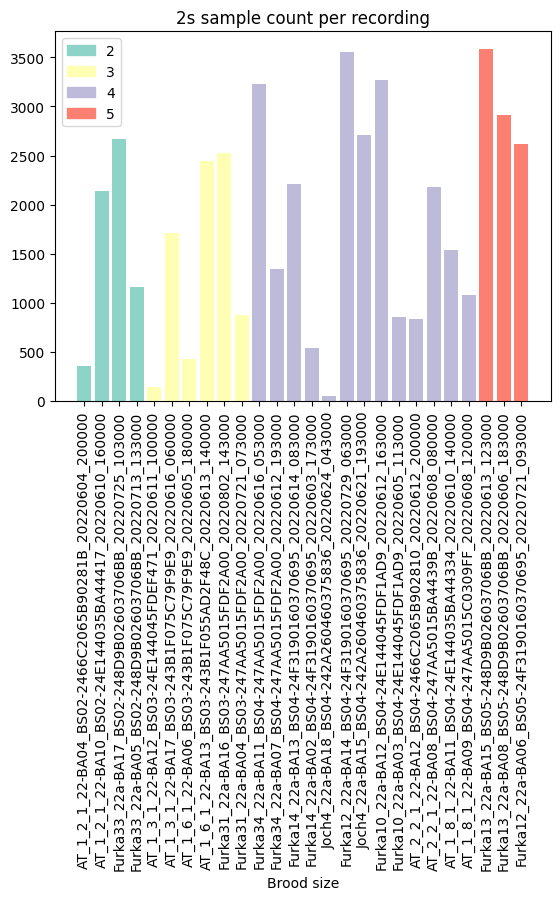

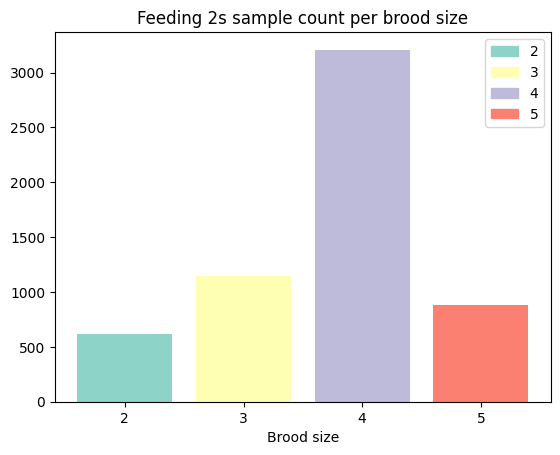

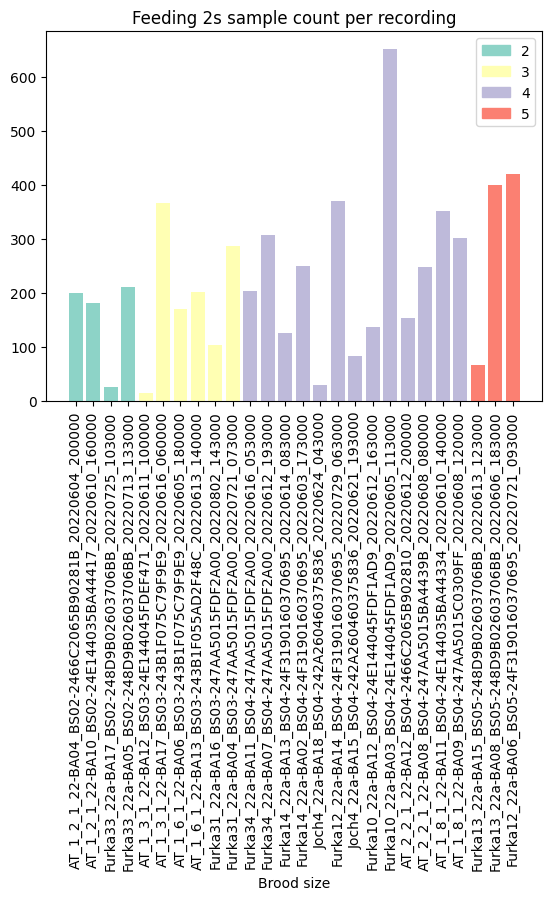

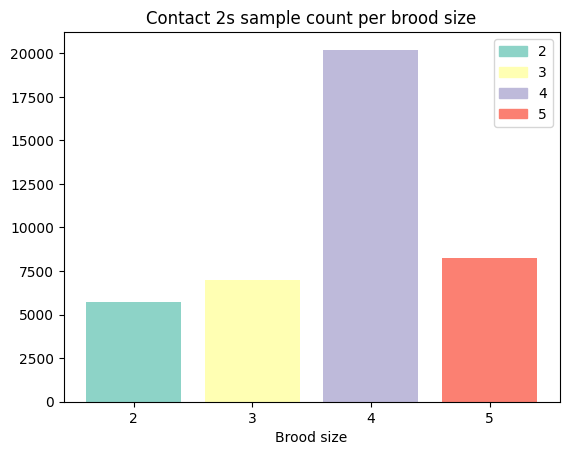

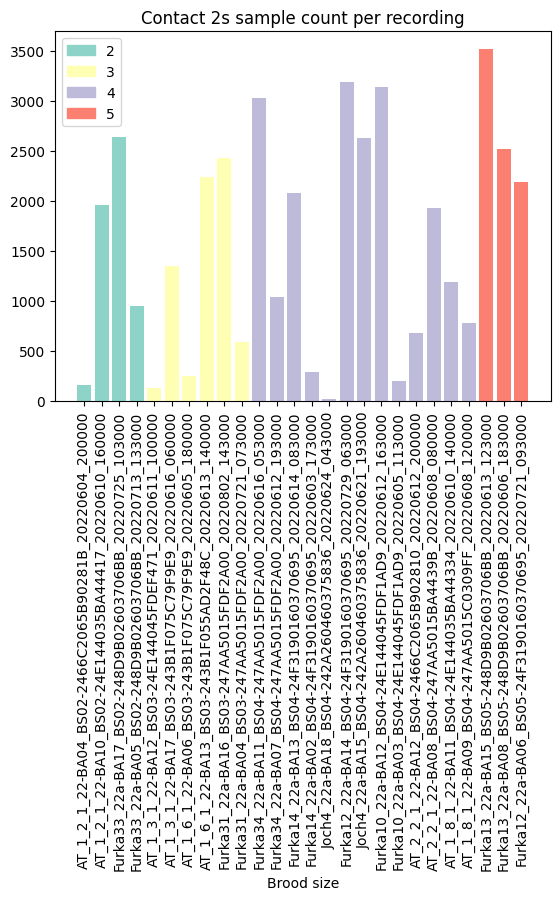

In [11]:
plot_sample_count(
	bs_cls_agg_df, x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood size',
	title = '2s sample count per brood size'
)

plot_sample_count(
	bs_agg_df, x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Brood size',
	title = '2s sample count per recording'
)

plot_sample_count(
	bs_feed_cls_agg_df, x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood size',
	title = 'Feeding 2s sample count per brood size'
)

plot_sample_count(
	bs_feeding_agg_df, x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Brood size',
	title = 'Feeding 2s sample count per recording'
)

plot_sample_count(
	bs_contact_cls_agg_df, x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood size',
	title = 'Contact 2s sample count per brood size'
)

plot_sample_count(
	bs_contact_agg_df, x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Brood size',
	title = 'Contact 2s sample count per recording'
)

## Brood age

In [2]:
ba_data = pd.read_csv('_data.export/s2.0-o1.0/brood-age.csv')
ba_data

,file,event,is_silence,class,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,contact,False,12,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,contact,False,12,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,contact,False,12,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,contact,False,12,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,contact,False,12,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52921,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,contact,False,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
52922,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,contact,False,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
52923,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,contact,False,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
52924,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,contact,False,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
ba_agg_df = count_samples_per_file(ba_data[~ba_data['is_silence']])
ba_agg_df

,recording,class,sample_count
0,Furka14_22a-BA02_BS04-24F3190160370695_2022060...,2,536
1,Furka10_22a-BA03_BS04-24E144045FDF1AD9_2022060...,3,855
2,AT_1_2_1_22-BA04_BS02-2466C2065B90281B_2022060...,4,361
3,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,4,876
4,Furka33_22a-BA05_BS02-248D9B02603706BB_2022071...,5,1158
5,Furka12_22a-BA06_BS05-24F3190160370695_2022072...,6,2613
6,AT_1_6_1_22-BA06_BS03-243B1F075C79F9E9_2022060...,6,424
7,Furka34_22a-BA07_BS04-247AA5015FDF2A00_2022061...,7,1348
8,AT_2_2_1_22-BA08_BS04-247AA5015BA4439B_2022060...,8,2180
9,Furka13_22a-BA08_BS05-248D9B02603706BB_2022060...,8,2914


In [14]:
ba_cls_agg_df = ba_agg_df[['class', 'sample_count']].groupby('class').sum().sort_values(by = 'class').reset_index()
ba_cls_agg_df

,class,sample_count
0,2,536
1,3,855
2,4,1237
3,5,1158
4,6,3037
5,7,1348
6,8,5094
7,9,1084
8,10,2142
9,11,4774


In [15]:
ba_feed_agg_df = count_samples_per_file(ba_data.loc[~ba_data['is_silence'] & (ba_data['event'] == 'feeding')])
ba_feed_agg_df

,recording,class,sample_count
0,Furka14_22a-BA02_BS04-24F3190160370695_2022060...,2,249
1,Furka10_22a-BA03_BS04-24E144045FDF1AD9_2022060...,3,651
2,AT_1_2_1_22-BA04_BS02-2466C2065B90281B_2022060...,4,200
3,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,4,286
4,Furka33_22a-BA05_BS02-248D9B02603706BB_2022071...,5,211
5,Furka12_22a-BA06_BS05-24F3190160370695_2022072...,6,419
6,AT_1_6_1_22-BA06_BS03-243B1F075C79F9E9_2022060...,6,171
7,Furka34_22a-BA07_BS04-247AA5015FDF2A00_2022061...,7,307
8,AT_2_2_1_22-BA08_BS04-247AA5015BA4439B_2022060...,8,248
9,Furka13_22a-BA08_BS05-248D9B02603706BB_2022060...,8,399


In [16]:
ba_feed_cls_agg_df = ba_feed_agg_df[['class', 'sample_count']].groupby('class').sum().sort_values(
	by = 'class').reset_index()
ba_feed_cls_agg_df

,class,sample_count
0,2,249
1,3,651
2,4,486
3,5,211
4,6,590
5,7,307
6,8,647
7,9,301
8,10,182
9,11,554


In [17]:
ba_contact_agg_df = count_samples_per_file(ba_data.loc[~ba_data['is_silence'] & (ba_data['event'] == 'contact')])
ba_contact_agg_df

,recording,class,sample_count
0,Furka14_22a-BA02_BS04-24F3190160370695_2022060...,2,287
1,Furka10_22a-BA03_BS04-24E144045FDF1AD9_2022060...,3,204
2,AT_1_2_1_22-BA04_BS02-2466C2065B90281B_2022060...,4,161
3,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,4,590
4,Furka33_22a-BA05_BS02-248D9B02603706BB_2022071...,5,947
5,Furka12_22a-BA06_BS05-24F3190160370695_2022072...,6,2194
6,AT_1_6_1_22-BA06_BS03-243B1F075C79F9E9_2022060...,6,253
7,Furka34_22a-BA07_BS04-247AA5015FDF2A00_2022061...,7,1041
8,AT_2_2_1_22-BA08_BS04-247AA5015BA4439B_2022060...,8,1932
9,Furka13_22a-BA08_BS05-248D9B02603706BB_2022060...,8,2515


In [18]:
ba_contact_cls_agg_df = ba_contact_agg_df[['class', 'sample_count']].groupby('class').sum().sort_values(
	by = 'class').reset_index()
ba_contact_cls_agg_df

,class,sample_count
0,2,287
1,3,204
2,4,751
3,5,947
4,6,2447
5,7,1041
6,8,4447
7,9,783
8,10,1960
9,11,4220


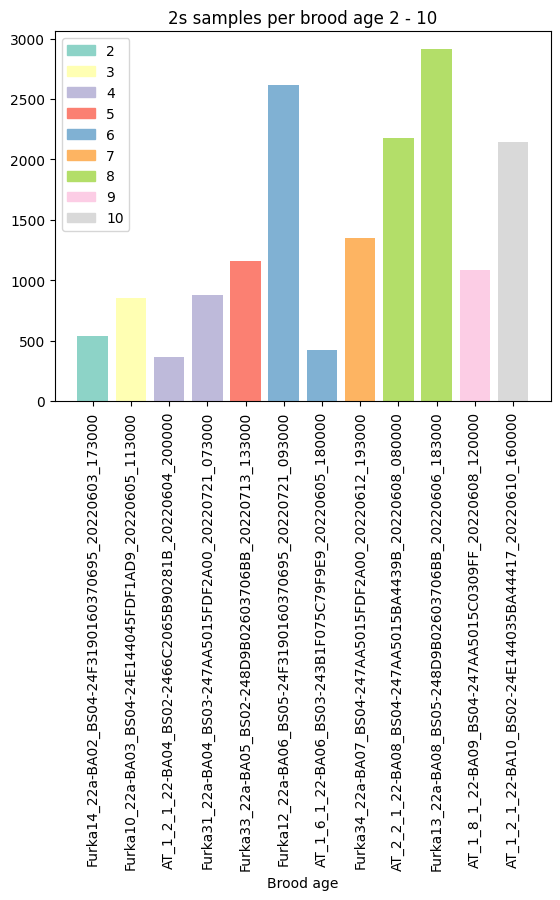

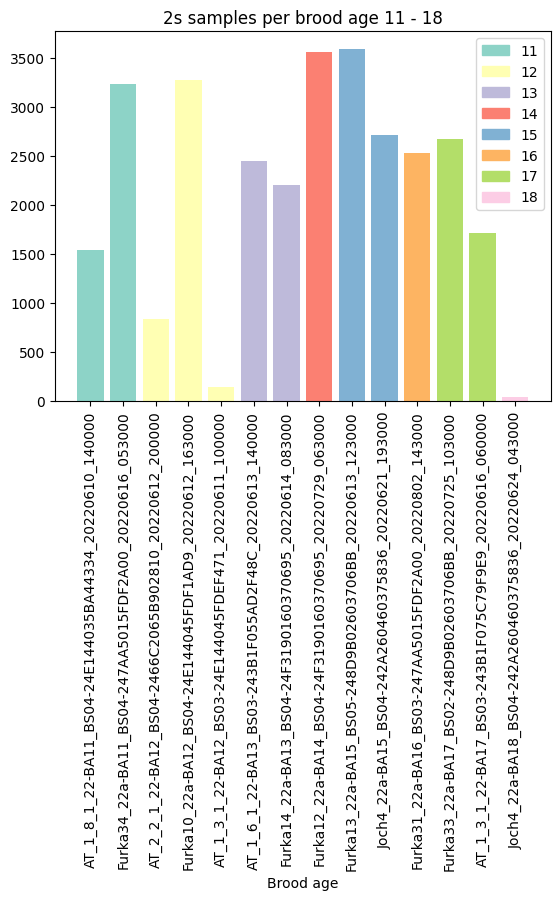

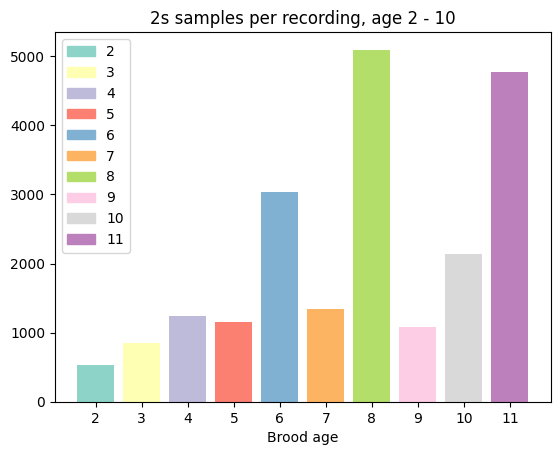

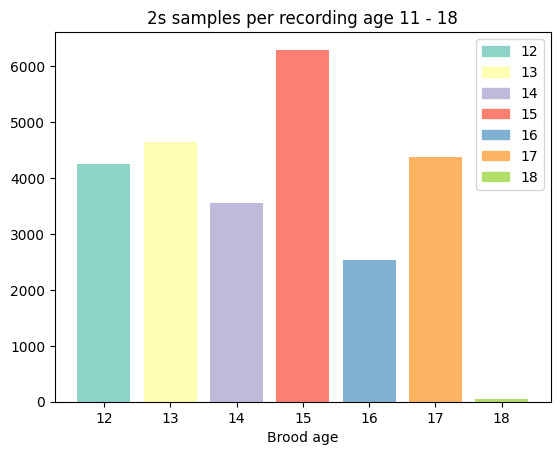

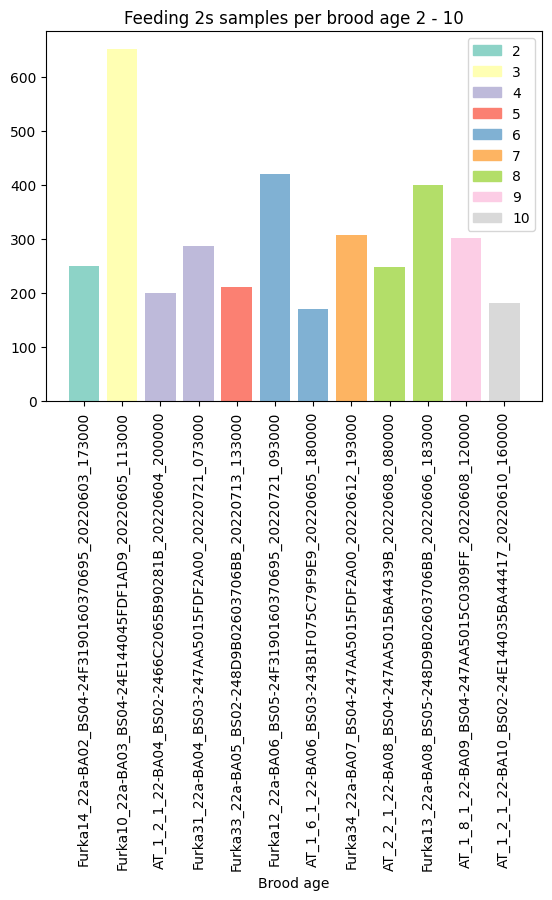

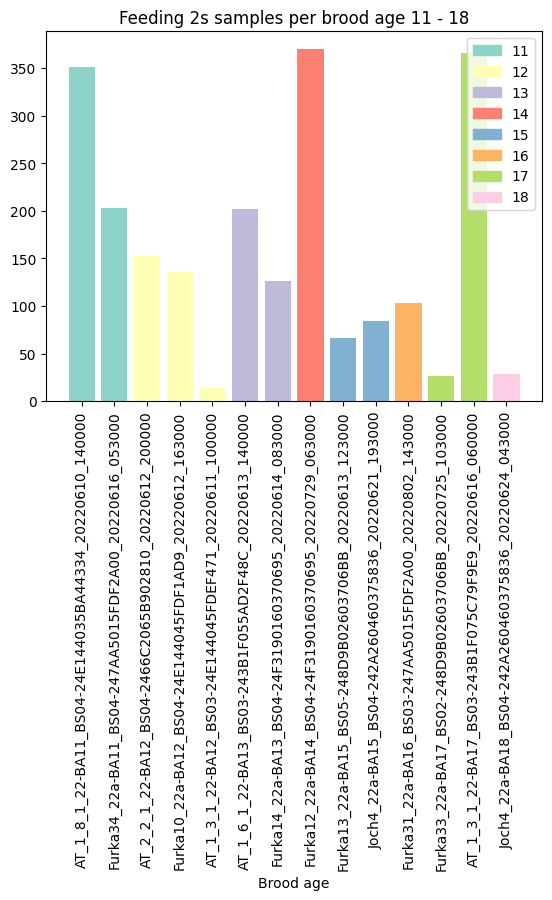

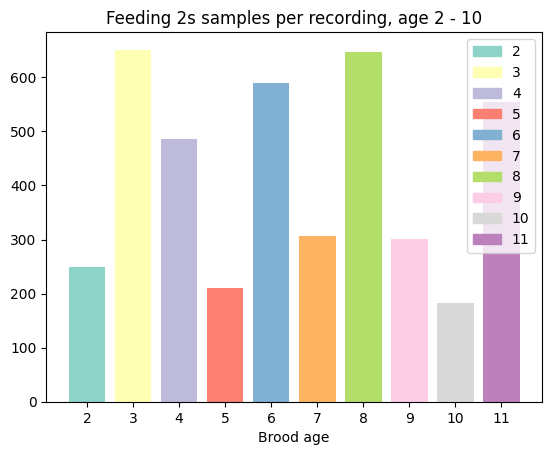

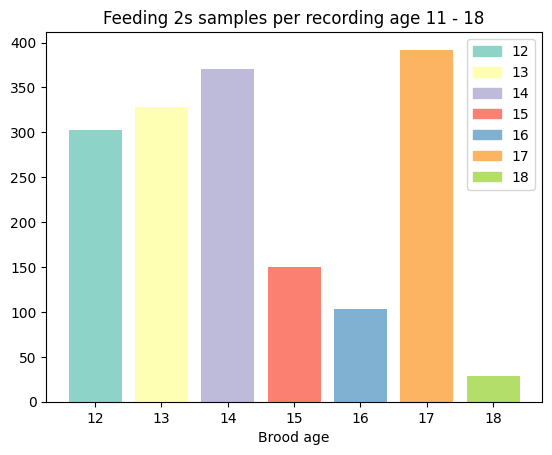

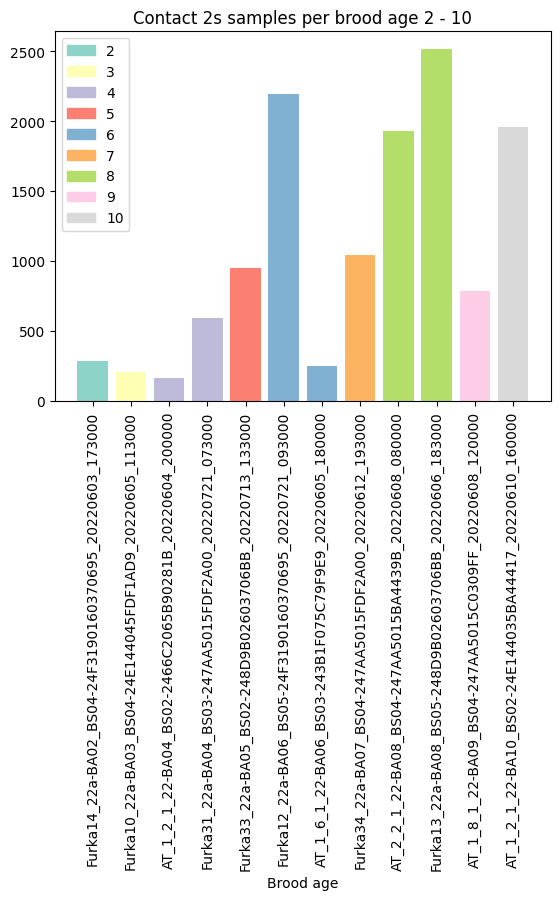

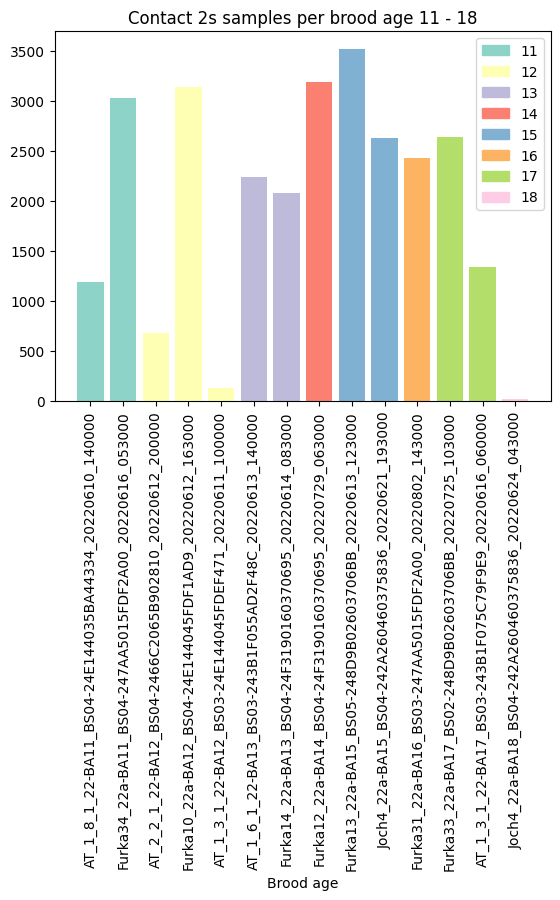

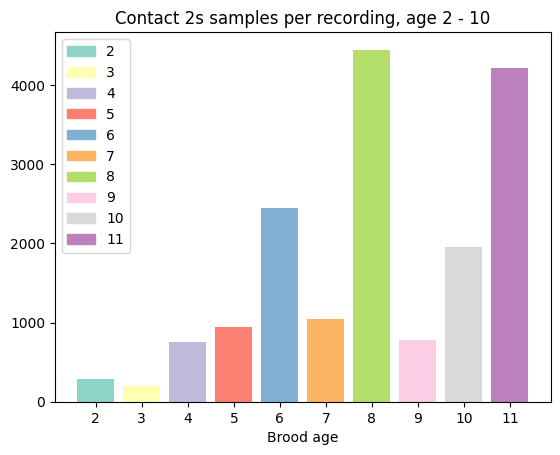

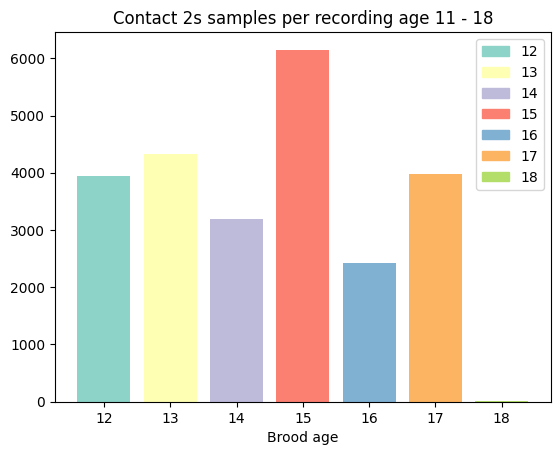

In [19]:
plot_sample_count(
	ba_agg_df.iloc[:12], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Brood age',
	title = '2s samples per brood age 2 - 10'
)

plot_sample_count(
	ba_agg_df.iloc[12:], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Brood age',
	title = '2s samples per brood age 11 - 18'
)

plot_sample_count(
	ba_cls_agg_df[:10], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = '2s samples per recording, age 2 - 10'
)

plot_sample_count(
	ba_cls_agg_df[10:], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = '2s samples per recording age 11 - 18'
)

plot_sample_count(
	ba_feed_agg_df.iloc[:12], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Brood age',
	title = 'Feeding 2s samples per brood age 2 - 10'
)

plot_sample_count(
	ba_feed_agg_df.iloc[12:], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Brood age',
	title = 'Feeding 2s samples per brood age 11 - 18'
)

plot_sample_count(
	ba_feed_cls_agg_df[:10], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = 'Feeding 2s samples per recording, age 2 - 10'
)

plot_sample_count(
	ba_feed_cls_agg_df[10:], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = 'Feeding 2s samples per recording age 11 - 18'
)

plot_sample_count(
	ba_contact_agg_df.iloc[:12], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Brood age',
	title = 'Contact 2s samples per brood age 2 - 10'
)

plot_sample_count(
	ba_contact_agg_df.iloc[12:], x_label_col = 'recording', x_rotation = 'vertical', x_label = 'Brood age',
	title = 'Contact 2s samples per brood age 11 - 18'
)

plot_sample_count(
	ba_contact_cls_agg_df[:10], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = 'Contact 2s samples per recording, age 2 - 10'
)

plot_sample_count(
	ba_contact_cls_agg_df[10:], x_label_col = 'class', x_rotation = 'horizontal', x_label = 'Brood age',
	title = 'Contact 2s samples per recording age 11 - 18'
)

### Age grouping

In [3]:
from sfw_brood.preprocessing import group_ages
from sklearn.preprocessing import OneHotEncoder

In [4]:
age_group_df = group_ages(
	ba_data[~ba_data['is_silence']],
	groups = [(0, 6), (7, 11), (12, 14), (15, 30)]
)
age_group_df

C:\Users\barto\Devel\Repos\PycharmProjects\SnowfinchWire.BroodAnalyzer\sfw_brood\preprocessing.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df['class'] = age_group_df['class'].apply(map_age)


,file,class,0-6,12-14,15-30,7-11
0,Furka12_22a-BA06_BS05-24F3190160370695_2022072...,0-6,1.0,0.0,0.0,0.0
1,Furka14_22a-BA02_BS04-24F3190160370695_2022060...,0-6,1.0,0.0,0.0,0.0
2,Furka14_22a-BA02_BS04-24F3190160370695_2022060...,0-6,1.0,0.0,0.0,0.0
3,Furka14_22a-BA02_BS04-24F3190160370695_2022060...,0-6,1.0,0.0,0.0,0.0
4,Furka14_22a-BA02_BS04-24F3190160370695_2022060...,0-6,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
46976,AT_1_2_1_22-BA10_BS02-24E144035BA44417_2022061...,7-11,0.0,0.0,0.0,1.0
46977,AT_1_2_1_22-BA10_BS02-24E144035BA44417_2022061...,7-11,0.0,0.0,0.0,1.0
46978,AT_1_2_1_22-BA10_BS02-24E144035BA44417_2022061...,7-11,0.0,0.0,0.0,1.0
46979,AT_1_2_1_22-BA10_BS02-24E144035BA44417_2022061...,7-11,0.0,0.0,0.0,1.0


In [6]:
groups_encoder = OneHotEncoder()
groups_1hot = groups_encoder.fit_transform(age_group_df['class'].values.reshape(-1, 1))
groups_1hot_df = pd.DataFrame(
	data = groups_1hot.toarray(),
	columns = groups_encoder.categories_
)

group_1hot_columns = [col[0] for col in groups_1hot_df.columns]
age_group_df[group_1hot_columns] = groups_1hot_df[group_1hot_columns]

age_group_df

,file,class,0-6,12-14,15-30,7-11
0,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,12-14,0.0,1.0,0.0,0.0
1,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,12-14,0.0,1.0,0.0,0.0
2,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,12-14,0.0,1.0,0.0,0.0
3,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,12-14,0.0,1.0,0.0,0.0
4,AT_1_3_1_22-BA12_BS03-24E144045FDEF471_2022061...,12-14,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
46976,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,15-30,0.0,0.0,1.0,0.0
46977,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,15-30,0.0,0.0,1.0,0.0
46978,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,15-30,0.0,0.0,1.0,0.0
46979,Furka33_22a-BA17_BS02-248D9B02603706BB_2022072...,15-30,0.0,0.0,1.0,0.0


In [5]:
cls_1hot = age_group_df[['0-6', '12-14', '15-30', '7-11']].idxmax(axis = 1)
age_group_df[cls_1hot != age_group_df['class']]

,file,class,0-6,12-14,15-30,7-11


In [10]:
age_group_agg_df = age_group_df[['file', 'class']]
age_group_agg_df = age_group_agg_df.groupby('class').count().reset_index()
age_group_agg_df

,class,file
0,0-6,6823
1,12-14,12461
2,15-30,13255
3,7-11,14442


In [26]:
from sfw_brood.preprocessing import balance_data

balance_data(age_group_df, classes = list(age_group_df.group.unique()), tolerance = 0.1)

,file,event,is_silence,class,group,12-14,7-11,<=6,>=15
15400,AT_1_6_1_22-BA13_BS03-243B1F055AD2F48C_2022061...,contact,False,13,12-14,1.0,0.0,0.0,0.0
29319,Furka10_22a-BA12_BS04-24E144045FDF1AD9_2022061...,contact,False,12,12-14,1.0,0.0,0.0,0.0
35487,Furka12_22a-BA14_BS04-24F3190160370695_2022072...,feeding,False,14,12-14,1.0,0.0,0.0,0.0
15617,AT_1_6_1_22-BA13_BS03-243B1F055AD2F48C_2022061...,contact,False,13,12-14,1.0,0.0,0.0,0.0
44908,Furka14_22a-BA13_BS04-24F3190160370695_2022061...,contact,False,13,12-14,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
41323,Furka13_22a-BA15_BS05-248D9B02603706BB_2022061...,contact,False,15,>=15,0.0,0.0,0.0,1.0
13021,AT_1_3_1_22-BA17_BS03-243B1F075C79F9E9_2022061...,contact,False,17,>=15,0.0,0.0,0.0,1.0
43237,Furka13_22a-BA15_BS05-248D9B02603706BB_2022061...,contact,False,15,>=15,0.0,0.0,0.0,1.0
13314,AT_1_3_1_22-BA17_BS03-243B1F075C79F9E9_2022061...,contact,False,17,>=15,0.0,0.0,0.0,1.0


In [11]:
age_group_df[age_group_df['file'].str.contains('Furka31_22a-BA04')]

,file,class,0-6,12-14,15-30,7-11
46484,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,0-6,0.0,0.0,1.0,0.0
46485,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,0-6,0.0,0.0,1.0,0.0
46486,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,0-6,0.0,0.0,1.0,0.0
46487,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,0-6,0.0,0.0,1.0,0.0
46488,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,0-6,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
47358,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,0-6,NaN,NaN,NaN,NaN
47359,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,0-6,NaN,NaN,NaN,NaN
47360,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,0-6,NaN,NaN,NaN,NaN
47361,Furka31_22a-BA04_BS03-247AA5015FDF2A00_2022072...,0-6,NaN,NaN,NaN,NaN
